# Plot Demos

This notebook demonstrates how to read in data files and make various plots.

In [17]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [18]:
import sys, os

codes_dir = os.path.abspath('../PythonCode')
sys.path.append(codes_dir)
print "Python codes can be found in %s"  % codes_dir

data_dir = os.path.abspath('../DataFiles')
print "Data files can be found in %s"  % data_dir

Python codes can be found in /Users/rjl/git/ptha_tutorial/PythonCode
Data files can be found in /Users/rjl/git/ptha_tutorial/DataFiles


### Function to clean up axes:

In [19]:
def fix_axes(ax=None):
    CClatitude = 41.75  # to rescale longitude
    if ax is None:
        ax = gca()   # get current axes
    ax.set_aspect(1. / cos(pi*CClatitude/180.)) 
    ax.ticklabel_format(format='plain',useOffset=False)

### Read in image and define function to plot it as background

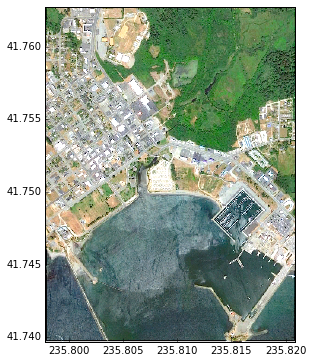

In [20]:
CCmap = imread('%s/MapsTopo/CCimage.png' % data_dir)
extent = (235.79781, 235.82087, 41.739671,41.762726)   #small region

def plot_CCmap():
    fig = figure(figsize=(6,6))
    ax = axes()
    imshow(CCmap,extent=extent)
    fix_axes(ax)
    return fig

fig = plot_CCmap()

### Read in topography

In [21]:
fixed_grid_file = os.path.join(data_dir, 'MapsTopo', 'fixedgrid_xyB_small.npy')
d=load(fixed_grid_file)
x=d[:,0]
y=d[:,1]
B=d[:,2]
topo = reshape(B, (250,250), order='F')
X = reshape(x, (250,250), order='F')
Y = reshape(y, (250,250), order='F')
print "Max topography: %g m above MHW" % topo.max()
print "Min topography: %g m " % topo.min()

Max topography: 14.9699 m above MHW
Min topography: -11.1536 m 


## Plot contour lines of topography

contour levels on land (green): [ 2  4  6  8 10 12 14]
contour levels in water (blue): [-12 -10  -8  -6  -4  -2]


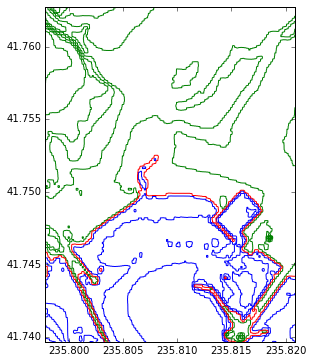

In [22]:
fig = figure(figsize=(6,6))

clines_land = arange(2,16,2)  
print "contour levels on land (green):", clines_land
contour(X,Y,topo,clines_land,colors='g')

clines_water = arange(-12,0,2) 
print "contour levels in water (blue):", clines_water
# specify solid lines '-' or negative topo will be dashed:
contour(X,Y,topo,clines_water,colors='b',linestyles='-')  

# shoreline (topo = 0 is MHW)
contour(X,Y,topo,[0],colors='r')

fix_axes()

## Plot contours on top of image

Contour levels: [  0.   2.   4.   6.   8.  10.  12.  14.  16.  18.  20.]


<matplotlib.contour.QuadContourSet instance at 0x10f403b00>

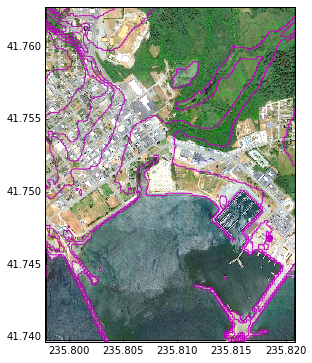

In [23]:
plot_CCmap()
clines = linspace(0,20,11)
print "Contour levels:", clines
contour(X,Y,topo,clines,colors='m')

## Read in zeta for one event and plot on image

In [24]:
events_dir = os.path.join(data_dir, 'Events')

<matplotlib.colorbar.Colorbar instance at 0x11b526d88>

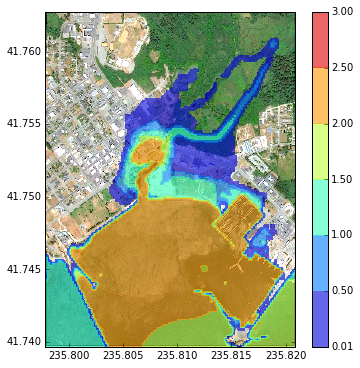

In [25]:
event = 'AASZa'
event_dir = os.path.join(events_dir, event)
hmax_file = os.path.join(event_dir, 'h_eta_small.npy')
hmax = load(hmax_file)
Hmax = hmax.reshape((250,250),order='F')

plot_CCmap()
clines = [0.01, 0.5, 1., 1.5, 2., 2.5, 3]
contourf(X,Y,Hmax,clines,alpha = 0.6)
colorbar()